In [2]:
import numpy as np
import pandas as pd

In [3]:
data_col_names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
                "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
                "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
                "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
                "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df_kddtrain=pd.read_table("C:\\Users\\ANUKOOL SRIVASTAVA\\Desktop\\NSL\\NSL_KDD_dataset\\KDDTrain.txt", sep=",", names=data_col_names)
df_kddtrain = df_kddtrain.iloc[:,:-1]
df_kddtest=pd.read_table("C:\\Users\\ANUKOOL SRIVASTAVA\\Desktop\\NSL\\NSL_KDD_dataset\\KDDTest.txt",sep=",", names=data_col_names)
df_kddtest = df_kddtest.iloc[:,:-1]

In [4]:
df_kddtrain['duration'].value_counts()

0        115955
1          1989
2           843
3           557
4           351
          ...  
38714         1
10028         1
7979          1
5930          1
2015          1
Name: duration, Length: 2981, dtype: int64

In [5]:
mapping= {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

df_kddtrain['attack_class'] = df_kddtrain['attack'].apply(lambda v: mapping[v])
df_kddtest['attack_class'] = df_kddtest['attack'].apply(lambda v: mapping[v])
df_kddtrain.drop(['attack'], axis=1, inplace=True)
df_kddtest.drop(['attack'], axis=1, inplace=True)

In [6]:
#Since 'num_outbound_cmds' fields have zero values we will delete it
df_kddtrain.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_kddtest.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [7]:
a=0
b=0
c=0
d=0
e=0
f=df_kddtrain['attack_class'].count()

for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'DoS':
        a=a+1

for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'Normal':
        b=b+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'Probe':
        c=c+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'R2L':
        d=d+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'U2R':
        e=e+1
        
print("Total attacks in KDDTrain= "+str(f))       
print("No of DoS attacks= "+str(a))   
print("No of Normal attacks= "+str(b))   
print("No of Probe attacks= "+str(c))   
print("No of R2L attacks= "+str(d))  
print("No of U2R attacks= "+str(e))   

Total attacks in KDDTrain= 125973
No of DoS attacks= 45927
No of Normal attacks= 67343
No of Probe attacks= 11656
No of R2L attacks= 995
No of U2R attacks= 52


In [8]:
k=0
l=0
m=0
n=0
o=0
p=df_kddtest['attack_class'].count()

for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'DoS':
        k=k+1

for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'Normal':
        l=l+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'Probe':
        m=m+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'R2L':
        n=n+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'U2R':
        o=o+1
        
print("Total attacks in KDDTest= "+str(p))       
print("No of DoS attacks= "+str(k))   
print("No of Normal attacks= "+str(l))   
print("No of Probe attacks= "+str(m))   
print("No of R2L attacks= "+str(n))  
print("No of U2R attacks= "+str(o))   

Total attacks in KDDTest= 22544
No of DoS attacks= 7458
No of Normal attacks= 9711
No of Probe attacks= 2421
No of R2L attacks= 2754
No of U2R attacks= 200


In [9]:
data = [[a, a/f*100,k,k/p*100], [b, b/f*100,l,l/p*100], [c,c/f*100,m,m/p*100],[d, d/f*100,n,n/p*100], [e, e/f*100,o,o/p*100]] 
#df = pd.DataFrame(data, columns = ['attack_train','freq%train','attack_test','freq%test'])
df_distribution = pd.DataFrame(data, index =['DoS', 'Normal', 'Probe', 'R2L','U2R']) 
df_distribution.columns=['attack_train','freq%train','attack_test','freq%test']
df_distribution

attack_train  freq%train  attack_test  freq%test
DoS            45927   36.457812         7458  33.081973
Normal         67343   53.458281         9711  43.075763
Probe          11656    9.252776         2421  10.738999
R2L              995    0.789852         2754  12.216111
U2R               52    0.041279          200   0.887154

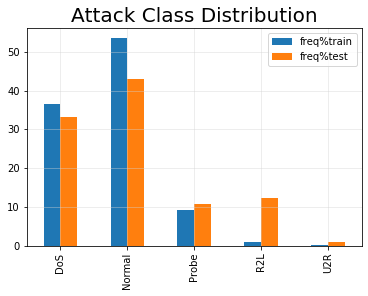

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plot = df_distribution[['freq%train', 'freq%test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


In [11]:
import seaborn as sns
import sklearn
import imblearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
cols = df_kddtrain.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_kddtrain.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_kddtest.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [13]:
sc_traindf

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised  ...  \
0      -0.095076          -0.027023  -0.809262        -0.011664  ...   
1      -0.095076          -0.027023  -0.809262        -0.011664  ...   
2      -0.095076          -0.027023  -0.809262        -0.011664  ...   
3      -0.095076          -0.027023   1.235694        -0.011664  ...   
4      -0.095076          -0.027023   1.235694        -0.011664  ...   
...          ...                ...        ...              ...  ...   
125968 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125969 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125970 -0.095076          -0.027023   1.235694        -0.011664  ...   
125971 -0.095076          -0.027023  -0.809262        -0.011664  ...   
125972 -0.095076          -0.027023   1.235694        -0.011664  ...   

        dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0            -0.324063           -0.818890               -0.782367   
1             0.734343           -1.035688               -1.161030   
2             0.734343           -0.809857               -0.938287   
3            -1.533670            1.258754                1.066401   
4             0.734343            1.258754                1.066401   
...                ...                 ...                     ...   
125968        0.734343           -0.818890               -0.938287   
125969        0.734343            1.159389                0.977304   
125970        0.734343           -0.773724               -0.893738   
125971        0.734343           -0.972455               -1.094207   
125972        0.734343           -0.349162               -0.492801   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    -0.280282                     0.069972   
1                     2.736852                     2.367737   
2                    -0.174417                    -0.480197   
3                    -0.439078                    -0.383108   
4                    -0.439078                    -0.480197   
...                        ...                          ...   
125968               -0.121485                    -0.480197   
125969               -0.386146                    -0.447834   
125970               -0.121485                    -0.480197   
125971               -0.174417                    -0.480197   
125972               -0.280282                     0.490690   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         -0.289103             -0.639532   
1                         -0.289103             -0.639532   
2                         -0.289103              1.608759   
3                          0.066252             -0.572083   
4                         -0.289103             -0.639532   
...                             ...                   ...   
125968                    -0.289103              1.608759   
125969                    -0.289103             -0.639532   
125970                    -0.289103              0.979238  

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_kddtrain.select_dtypes(include=['object']).copy()
cattest = df_kddtest.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [15]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

sc_traindf = df_kddtrain.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

In [16]:
#Converting 2d array cat_Y to 1d array y_test/train
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

In [17]:
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)

In [18]:
y_res

array([1, 1, 0, ..., 4, 4, 4])

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();
rfc.fit(X_res, y_res);

In [20]:
score = np.round(rfc.feature_importances_,3)

# Feature Selection

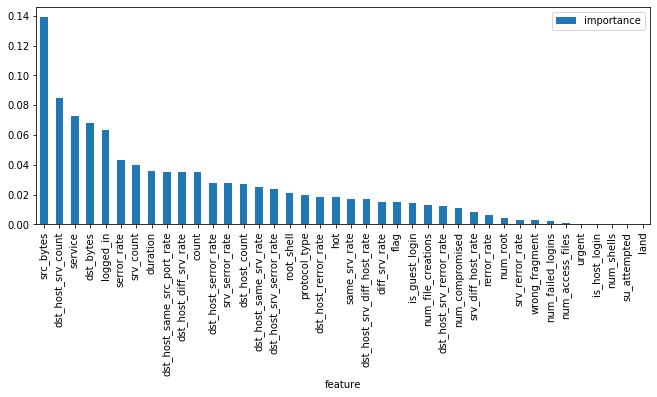

In [21]:
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [22]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [23]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

In [24]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape


(22544, 41)

In [25]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
    
   
        
create_classdict()


In [45]:
for k, v in classdict.items():
    print(k,v)

Normal_DoS [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
147384 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147385 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147386 -0.110249  -0.007586  -0.004919 -0.014089       -0.089486 -0.007736   
147387 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147388 -0.110249  -0.007757  -0.004919 -0.014089       11.743480 -0.007736   

             hot  num_failed_logins  logged_in  num

Normal_Probe [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
12     -0.110249  -0.007713  -0.004359 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
203071 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
203072 -0.110249  -0.007759  -0.004919 -0.014089       -0.089486 -0.007736   
203073 -0.110249  -0.007761  -0.004919 -0.014089       -0.089486 -0.007736   
203074 -0.110249  -0.007761  -0.004919 -0.014089       -0.089486 -0.007736   
203075 -0.110249  -0.007761  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  n

Normal_R2L [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
12     -0.110249  -0.007713  -0.004359 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
269419 -0.110249  -0.007705  -0.004919 -0.014089       -0.089486 -0.007736   
269420 -0.105642  -0.006562  -0.004919 -0.014089       -0.089486 -0.007736   
269421 -0.109865  -0.007568  -0.004311 -0.014089       -0.089486 -0.007736   
269422  1.834074   0.866787  -0.004919 -0.014089       -0.089486 -0.007736   
269423 -0.110249  -0.007705  -0.004919 -0.014089       -0.089486 -0.007736   

              hot  num_failed_logins  logged_in  nu

Normal_U2R [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
12     -0.110249  -0.007713  -0.004359 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
336710 -0.110249  -0.007762  -0.003517 -0.014089       -0.089486 -0.007736   
336711 -0.042674  -0.007497  -0.004239 -0.014089       -0.089486 -0.007736   
336712 -0.110249  -0.007762  -0.003469 -0.014089       -0.089486 -0.007736   
336713 -0.110249  -0.007762  -0.004403 -0.014089       -0.089486 -0.007736   
336714 -0.086828  -0.007712  -0.003942 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num

In [26]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

pretrain_Probe = classdict['Normal_Probe'][0]
pretest_Probe = classdict['Normal_Probe'][1]
grpclass_Probe = 'Normal_Probe'

pretrain_R2L = classdict['Normal_R2L'][0]
pretest_R2L = classdict['Normal_R2L'][1]
grpclass_R2L = 'Normal_R2L'

pretrain_U2R = classdict['Normal_U2R'][0]
pretest_U2R = classdict['Normal_U2R'][1]
grpclass_U2R = 'Normal_U2R'

In [62]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()
enc.fit(Xresdfcat)

Xtestcat

Xtestcat=Xtestcat.reset_index()
del Xtestcat['index']

Xtestcat

Xtestcat.to_numpy()

X_train_1hotenc = enc.transform(Xresdfcat).toarray()
        
    # Transform test data
X_test_1hotenc = Xtestcat.to_numpy()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

print('\n',X_test)

print('\n',X_train)






 [[-2.19881116e-02 -9.68959693e-02 -8.90372630e-01 ... -4.31856186e-01
  -3.58117560e-01  4.50000000e+01]
 [-2.19881116e-02 -9.68959693e-02 -8.90372630e-01 ... -4.31856186e-01
  -3.58117560e-01  4.50000000e+01]
 [ 5.47309946e-03 -9.68959693e-02 -8.90372630e-01 ...  1.55990593e+00
  -3.58117560e-01  1.90000000e+01]
 ...
 [-2.13176037e-02 -5.26899441e-02  1.12312527e+00 ... -3.99204348e-01
  -3.21505317e-01  2.20000000e+01]
 [ 9.33730877e-02  2.94925879e-01  1.12312527e+00 ... -4.31856186e-01
  -3.58117560e-01  2.20000000e+01]
 [-2.18992746e-02 -9.49165950e-02 -8.90372630e-01 ... -4.31856186e-01
  -3.58117560e-01  1.10000000e+01]]

 [[-0.0076786  -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00773737 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00776224 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 ...
 [-0.00758644 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00776224 -0.00491864 -0.80926182 ...  0.          0.
   0.

In [38]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
                
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
    
from sklearn import metrics
models = []
   
models.append(('Decision Tree Classifier', DTC_Classifier))

In [67]:

# HEERE DECISION TREE IS THE ALGORITHM ON WHICH MODEL IS CREATED
def modelPrediction(pretrain, pretest, grpclass):
    for i, v in models:
        scores = cross_val_score(v, X_train, Y_train, cv=10)
        accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
        confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
        classification = metrics.classification_report(Y_train, v.predict(X_train))
        print()
        print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
        print()
        print ("Cross Validation Mean Score:" "\n", scores.mean())
        print()
        print ("Model Accuracy:" "\n", accuracy)
        print()
        print("Confusion matrix:" "\n", confusion_matrix)
        print()
        print("Classification report:" "\n", classification) 
        print()

    # This will be our selected algo which will be the model.
modelPrediction(pretrain, pretest, grpclass)
modelPrediction(pretrain_Probe, pretest_Probe, grpclass_Probe)
modelPrediction(pretrain_R2L, pretest_R2L, grpclass_R2L)
modelPrediction(pretrain_U2R, pretest_U2R, grpclass_U2R)


============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997698368976862

Model Accuracy:
 0.9999480272634127

Confusion matrix:
 [[67343     0]
 [    7 67336]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_Probe Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997698368976862

Model Accuracy:
 0.9999480272634127

Confusion matrix:
 [[67343     0]
 [    7 67336]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
   

In [75]:
Xnew = X_train
ynew = DTC_Classifier.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

for alarm in ynew:
    if alarm == 1.0:
        print('***************Suspicious Packet found. Please do the needfull*****************')
        
    else:
        print ('Safe Packet Type=Normal')

X=[[-0.0076786  -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00773737 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00776224 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 ...
 [-0.00758644 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00776224 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]
 [-0.00775747 -0.00491864 -0.80926182 ...  0.          0.
   0.        ]], Predicted=[1. 1. 0. ... 0. 0. 0.]
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
*******

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
********

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the ne

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************S

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************S

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************S

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal


Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************S

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please d

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************S

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
********

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************S

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Pac

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull**

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please d

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please d

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please d

Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
********

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. 

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspiciou

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************S

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please d

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Pac

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please d

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please d

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please d

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************


***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the ne

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspiciou

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal


Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**********

***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**********

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet

Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal


Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
Safe Packet Type=Normal
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull*****************
***************Suspicious Packet found. Please do the needfull**

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type=Normal
Safe Packet Type

In [77]:
import pickle
pickle_out=open("DTC_Classifier.pkl","wb")
pickle.dump(DTC_Classifier,pickle_out)
pickle_out.close()



In [78]:
X_test[:300]

array([[-2.19881116e-02, -9.68959693e-02, -8.90372630e-01, ...,
        -4.31856186e-01, -3.58117560e-01,  4.50000000e+01],
       [-2.19881116e-02, -9.68959693e-02, -8.90372630e-01, ...,
        -4.31856186e-01, -3.58117560e-01,  4.50000000e+01],
       [ 5.47309946e-03, -9.68959693e-02, -8.90372630e-01, ...,
         1.55990593e+00, -3.58117560e-01,  1.90000000e+01],
       ...,
       [-2.14149014e-02,  1.47321112e-01,  1.12312527e+00, ...,
        -4.31856186e-01, -3.58117560e-01,  2.20000000e+01],
       [-2.19881116e-02, -9.61890499e-02, -8.90372630e-01, ...,
        -4.31856186e-01, -3.58117560e-01,  5.50000000e+01],
       [-2.19881116e-02, -9.68959693e-02, -8.90372630e-01, ...,
        -4.31856186e-01,  3.30310672e+00,  4.50000000e+01]])

In [76]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define captured file
capture = X_train[:100]
# save to csv file
np.savetxt('capture.txt',capture, fmt='%f')

In [73]:
X_train

array([[-0.0076786 , -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00773737, -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00776224, -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00758644, -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00776224, -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00775747, -0.00491864, -0.80926182, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# load numpy array from csv file
from numpy import loadtxt
# load array
capture = loadtxt('capture.csv', delimiter=',')
# print the array
print(capture)


In [40]:
# Load the Model back from file
with open('DTC_Classifier.pkl', 'rb') as file:  
    Pickled_DTC_Model = pickle.load(file)

Pickled_DTC_Model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
Xnew = X_train[:10]
ynew = Pickled_DTC_Model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

for alarm in ynew:
    if alarm == 1.0:
        print('***************Suspicious Packet found. Please do the needfull*****************')
        
    else:
        print ('Safe Packet Type=Normal')

X=[[-0.0076786  -0.00491864 -0.80926182 -0.71704549 -0.35434285 -0.81888998
  -0.28028168  0.06997226 -0.63953191  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.00773737 -0.00491864 -0.80926182 -0.62098246 -0.36811021 -1.03568764
   2.73685167  2.36773734 -0.63953191  0.          0.          0.
   0.          0.          0.  